<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #D8CEF6;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Stroke Predictions <br>
    (EDA / Predict)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Stroke Predictions (Classification)</div>**


## Goal
> ## EDA : Column Analysis
> ## Modeling : Predicting Stroke Occurrence

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from imblearn.over_sampling import SMOTE

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning

# For Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('/kaggle/input/stroke-predictions-dataset-of-indians/Stroke_Prediction_Indians.csv')
df.head()

,ID,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
0,1,78,Female,0,0,1,Private,Rural,267.30,36.2,...,Non-Vegetarian,0,0,11,0,Tertiary,Middle,88,South,0
1,2,60,Female,0,0,0,Private,Rural,207.24,19.8,...,Vegetarian,0,0,9,0,Secondary,High,56,East,0
2,3,69,Male,0,0,0,Private,Urban,161.30,34.5,...,Mixed,1,0,3,0,Secondary,High,63,North,1
3,4,43,Male,0,0,1,Never Worked,Urban,247.49,48.8,...,Mixed,0,1,4,0,Tertiary,Middle,93,South,0
4,5,30,Female,0,0,1,Government,Urban,116.57,31.3,...,Mixed,0,1,9,0,Secondary,High,99,West,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172000 entries, 0 to 171999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        172000 non-null  int64  
 1   Age                       172000 non-null  int64  
 2   Gender                    172000 non-null  object 
 3   Hypertension              172000 non-null  int64  
 4   Heart Disease             172000 non-null  int64  
 5   Ever Married              172000 non-null  int64  
 6   Work Type                 172000 non-null  object 
 7   Residence Type            172000 non-null  object 
 8   Average Glucose Level     172000 non-null  float64
 9   BMI                       172000 non-null  float64
 10  Smoking Status            172000 non-null  object 
 11  Physical Activity         172000 non-null  object 
 12  Dietary Habits            172000 non-null  object 
 13  Alcohol Consumption       172000 non-null  i

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,172000.0,86000.500000,49652.267488,1.0,43000.75,86000.50,129000.25,172000.0
Age,172000.0,54.009826,21.076357,18.0,36.00,54.00,72.00,90.0
Hypertension,172000.0,0.150134,0.357203,0.0,0.00,0.00,0.00,1.0
Heart Disease,172000.0,0.100279,0.300373,0.0,0.00,0.00,0.00,1.0
Ever Married,172000.0,0.300965,0.458679,0.0,0.00,0.00,1.00,1.0
Average Glucose Level,172000.0,184.931265,66.314107,70.0,127.54,184.76,242.44,300.0
BMI,172000.0,30.012799,11.570356,10.0,20.00,30.00,40.10,50.0
Alcohol Consumption,172000.0,0.200169,0.400128,0.0,0.00,0.00,0.00,1.0
Chronic Stress,172000.0,0.250000,0.433014,0.0,0.00,0.00,0.25,1.0
Sleep Hours,172000.0,7.500221,2.875179,3.0,5.00,7.00,10.00,12.0


In [5]:
df.describe(include='object').T

,count,unique,top,freq
Gender,172000,3,Male,82626
Work Type,172000,5,Private,86041
Residence Type,172000,2,Urban,86079
Smoking Status,172000,4,Never smoked,103438
Physical Activity,172000,4,Sedentary,68967
Dietary Habits,172000,3,Non-Vegetarian,86006
Education Level,172000,4,Secondary,68812
Income Level,172000,3,Low,86133
Region,172000,4,East,43115


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [6]:
df.drop('ID', axis=1, inplace=True)

print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Age                         0.0
Gender                      0.0
Hypertension                0.0
Heart Disease               0.0
Ever Married                0.0
Work Type                   0.0
Residence Type              0.0
Average Glucose Level       0.0
BMI                         0.0
Smoking Status              0.0
Physical Activity           0.0
Dietary Habits              0.0
Alcohol Consumption         0.0
Chronic Stress              0.0
Sleep Hours                 0.0
Family History of Stroke    0.0
Education Level             0.0
Income Level                0.0
Stroke Risk Score           0.0
Region                      0.0
Stroke Occurrence           0.0
dtype: float64

Duplicate Rows (%):
0.0


In [7]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)

total_rows = len(df)
outlier_count = len(outliers)
outlier_ratio = (outlier_count / total_rows) * 100

if outliers.empty:
    print("No outliers")
else:
    print(f"Number of Outliers: {outlier_count}")
    print(f"Outlier Ratio: {outlier_ratio:.2f}%")

Number of Outliers: 163215
Outlier Ratio: 94.89%


### I do not remove outliers because there is a large percentage of outliers.

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Correlation Analysis</div>

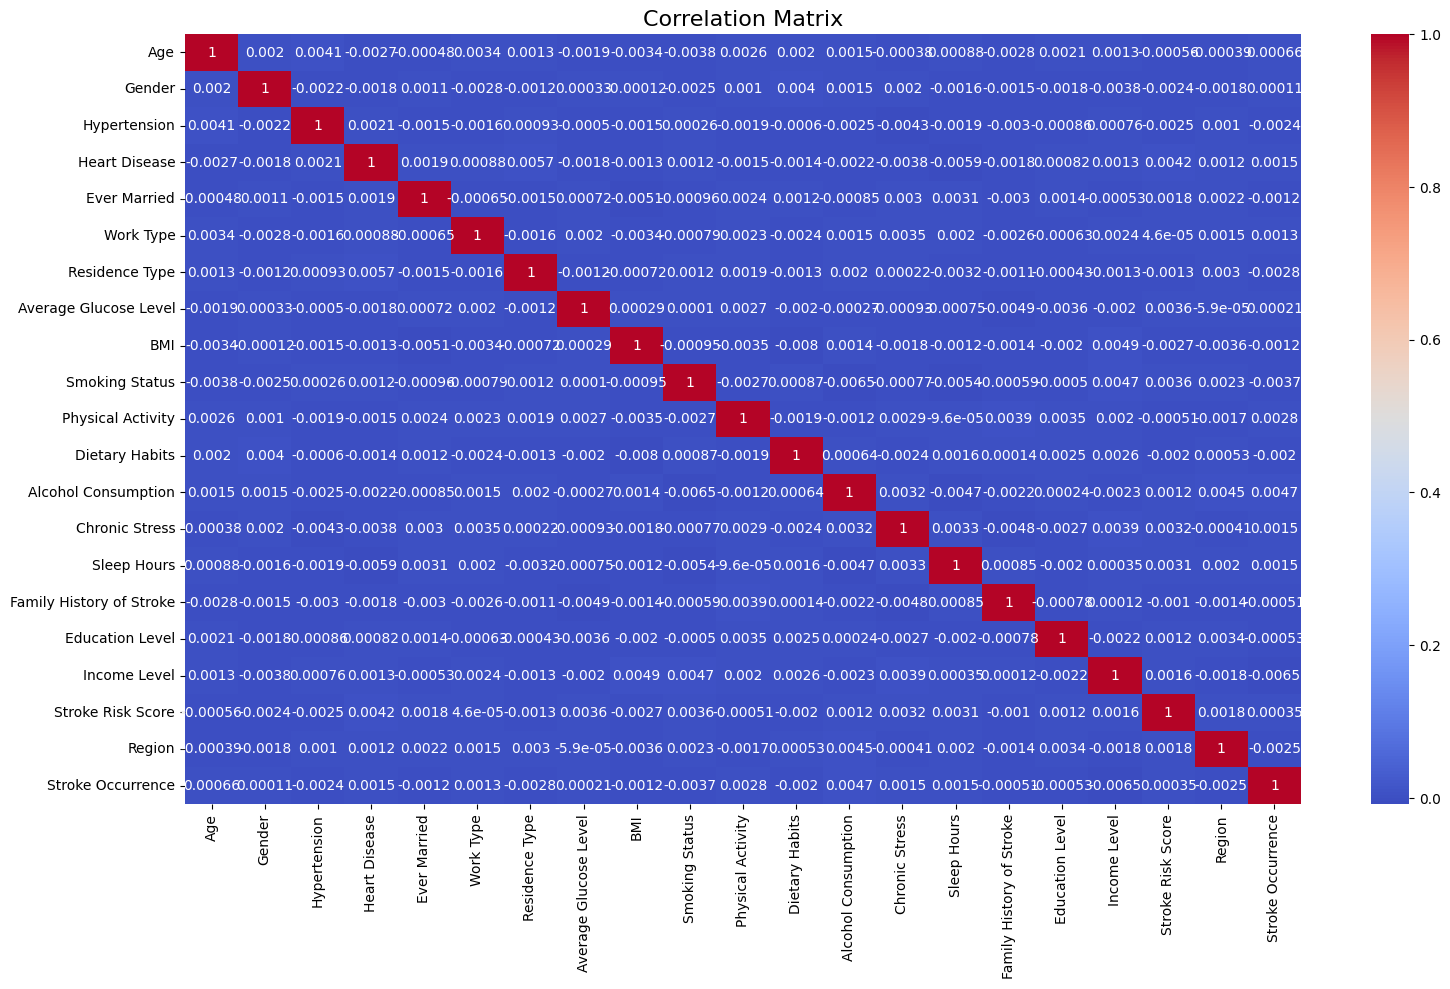

In [8]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

### Assume that there is no multicollinearity problem 

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of Machine Learning Model Performance</div>

In [9]:
X = df.drop('Stroke Occurrence', axis=1)
y = df['Stroke Occurrence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
#    "SVM": SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

### I used robust scaling because of outlier

In [10]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.898576,0.807438,0.898576,0.850572
1,KNN,0.876453,0.817955,0.876453,0.843746
2,Decision Tree,0.799128,0.816729,0.799128,0.807702
3,Random Forest,0.898576,0.807438,0.898576,0.850572
4,XGBoost,0.898547,0.807435,0.898547,0.850558


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of Deep Learning Model Performance</div>

In [11]:
# NN Model 
simple_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(32, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

simple_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
simple_nn.summary()

history = simple_nn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = simple_nn.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8995 - loss: 0.3368 - val_accuracy: 0.9035 - val_loss: 0.3192
Epoch 2/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8990 - loss: 0.3285 - val_accuracy: 0.9035 - val_loss: 0.3194
Epoch 3/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9008 - loss: 0.3241 - val_accuracy: 0.9035 - val_loss: 0.3192
Epoch 4/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9008 - loss: 0.3237 - val_accuracy: 0.9035 - val_loss: 0.3188
Epoch 5/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9009 - loss: 0.3229 - val_accuracy: 0.9035 - val_loss: 0.3209
Epoch 6/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9003 - loss: 0.3237 - val_accuracy: 0.9035 - val_loss: 0.3204
Epoch 7/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9000 - loss: 0.3239 - val_accuracy: 0.9035 - val_loss: 0.3196
Epoch 8/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9007 - loss: 0.3219 - 

In [12]:
# MLP Model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.summary()

history = mlp_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = simple_nn.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8954 - loss: 0.3431 - val_accuracy: 0.9035 - val_loss: 0.3201
Epoch 2/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8991 - loss: 0.3318 - val_accuracy: 0.9035 - val_loss: 0.3190
Epoch 3/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9011 - loss: 0.3255 - val_accuracy: 0.9035 - val_loss: 0.3183
Epoch 4/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9000 - loss: 0.3267 - val_accuracy: 0.9035 - val_loss: 0.3181
Epoch 5/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8995 - loss: 0.3272 - val_accuracy: 0.9035 - val_loss: 0.3178
Epoch 6/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9002 - loss: 0.3254 - val_accuracy: 0.9035 - val_loss: 0.3183
Epoch 7/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9005 - loss: 0.3245 - val_accuracy: 0.9035 - val_loss: 0.3180
Epoch 8/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9025 - loss: 0.3197 - 

In [13]:
# CNN Model

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') 
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

history = cnn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = simple_nn.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 18, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 9, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,689 (73.00 KB)

 Trainable params: 18,689 (73.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8990 - loss: 0.3351 - val_accuracy: 0.9035 - val_loss: 0.3190
Epoch 2/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9008 - loss: 0.3248 - val_accuracy: 0.9035 - val_loss: 0.3186
Epoch 3/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9013 - loss: 0.3231 - val_accuracy: 0.9035 - val_loss: 0.3195
Epoch 4/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9008 - loss: 0.3242 - val_accuracy: 0.9035 - val_loss: 0.3175
Epoch 5/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8997 - loss: 0.3263 - val_accuracy: 0.9035 - val_loss: 0.3176
Epoch 6/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9003 - loss: 0.3250 - val_accuracy: 0.9035 - val_loss: 0.3198
Epoch 7/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9004 - loss: 0.3249 - val_accuracy: 0.9035 - val_loss: 0.3185
Epoch 8/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9015 - loss: 0.3223 - 

In [14]:
# Optimized Model 
optimized_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimized_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
optimized_model.summary()

history = optimized_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = optimized_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,825 (54.00 KB)

 Trainable params: 13,441 (52.50 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8923 - loss: 0.3545 - val_accuracy: 0.9035 - val_loss: 0.3258
Epoch 2/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9012 - loss: 0.3279 - val_accuracy: 0.9035 - val_loss: 0.3213
Epoch 3/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9004 - loss: 0.3269 - val_accuracy: 0.9035 - val_loss: 0.3209
Epoch 4/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9012 - loss: 0.3238 - val_accuracy: 0.9035 - val_loss: 0.3189
Epoch 5/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9003 - loss: 0.3255 - val_accuracy: 0.9035 - val_loss: 0.3186
Epoch 6/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8990 - loss: 0.3286 - val_accuracy: 0.9035 - val_loss: 0.3175
Epoch 7/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8993 - loss: 0.3275 - val_accuracy: 0.9035 - val_loss: 0.3180
Epoch 8/10
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9016 - loss: 0.3223 -

In [15]:
def evaluate_model_on_test(model, X_test, y_test):
    y_pred_prob = model.predict(X_test, verbose=0)
    
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

results_deep = []

models_dict = {
    "Simple NN": simple_nn,
    "MLP": mlp_model,
    "CNN": cnn_model,
    "Optimized NN": optimized_model
}

for model_name, model in models_dict.items():
    if model_name == "CNN":  
        acc, precision, recall, f1 = evaluate_model_on_test(model, X_test_reshaped, y_test)
    else:
        acc, precision, recall, f1 = evaluate_model_on_test(model, X_test_scaled, y_test)
    
    results_deep.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })


results_df2 = pd.DataFrame(results_deep)

results_df2

,Model,Accuracy,Precision,Recall,F1-Score
0,Simple NN,0.898576,0.807438,0.898576,0.850572
1,MLP,0.898576,0.807438,0.898576,0.850572
2,CNN,0.898576,0.807438,0.898576,0.850572
3,Optimized NN,0.898576,0.807438,0.898576,0.850572


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>


Best Model (Machine Learning):
Model        Logistic Regression
Accuracy                0.898576
Precision               0.807438
Recall                  0.898576
F1-Score                0.850572
Name: 0, dtype: object


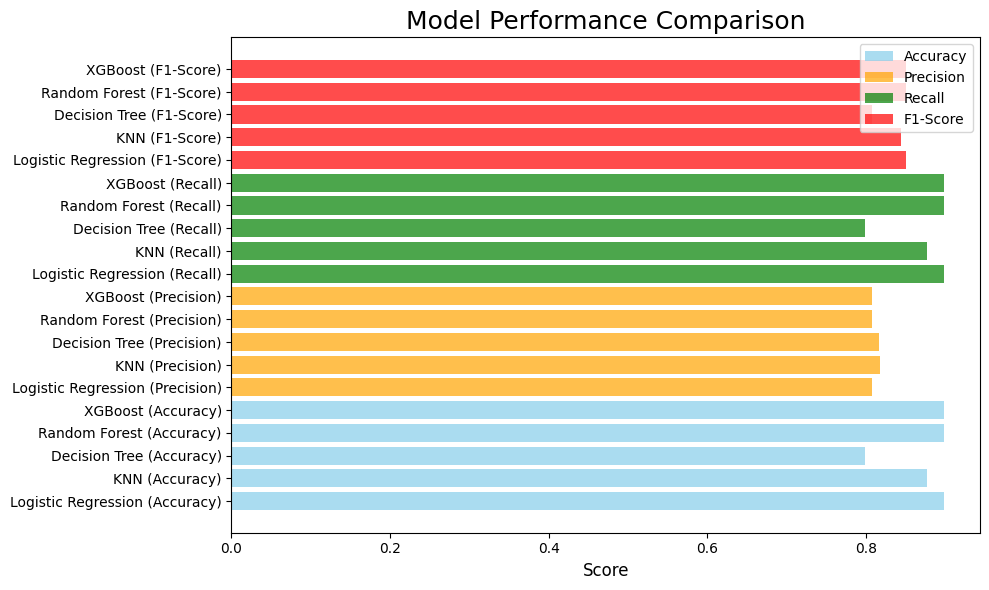


Optimal Model based on Accuracy: Logistic Regression with Accuracy = 0.8986


In [16]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Machine Learning):")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")


Best Model (Deep Learning):
Model        Simple NN
Accuracy      0.898576
Precision     0.807438
Recall        0.898576
F1-Score      0.850572
Name: 0, dtype: object


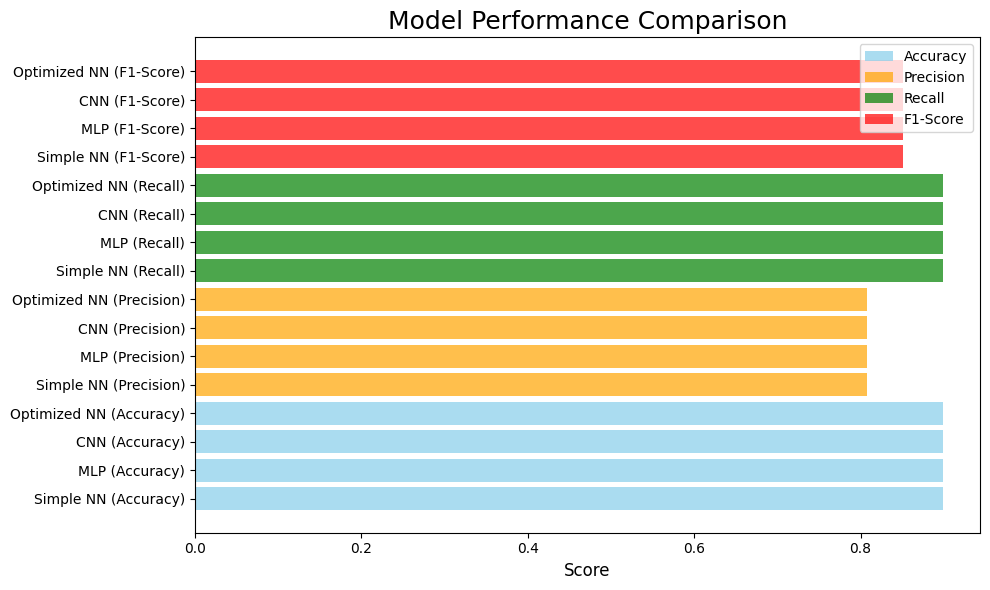


Optimal Model based on Accuracy: Simple NN with Accuracy = 0.8986


In [17]:
best_model2 = results_df2.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Deep Learning):")
print(best_model2)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df2['Model'] + f" ({metric})", results_df2[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model2['Model']} with Accuracy = {best_model2['Accuracy']:.4f}")

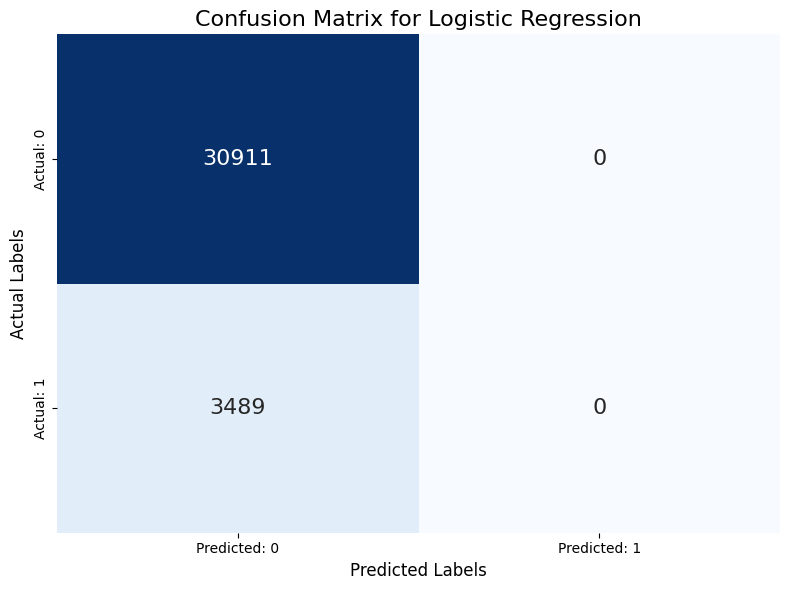

In [18]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted: 0", "Predicted: 1"], 
            yticklabels=["Actual: 0", "Actual: 1"], cbar=False, annot_kws={"size": 16})

plt.title("Confusion Matrix for Logistic Regression", fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('Actual Labels', fontsize=12)
plt.tight_layout()
plt.show()

### As a result, Model predicted '0' for all the data, which appears to be a data distribution problem. Therefore, we need to augment the data in the same way as SMOTE.

Class Distribution:
Stroke Occurrence
0    154904
1     17096
Name: count, dtype: int64

Class Distribution (Percentage):
Stroke Occurrence
0    90.060465
1     9.939535
Name: count, dtype: float64


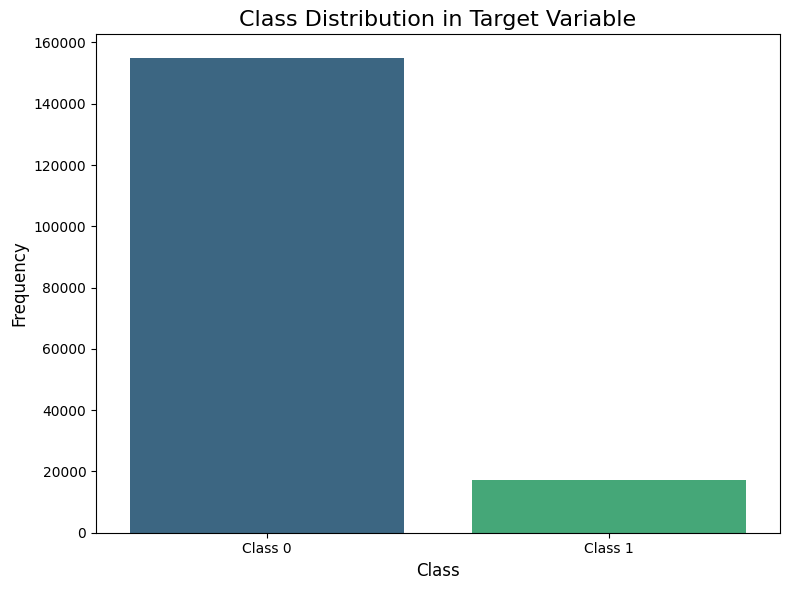

In [19]:
class_counts = pd.Series(y).value_counts()
print("Class Distribution:")
print(class_counts)

class_percentage = class_counts / len(y) * 100
print("\nClass Distribution (Percentage):")
print(class_percentage)

plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="viridis")
plt.title("Class Distribution in Target Variable", fontsize=16)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Class 0", "Class 1"])
plt.tight_layout()
plt.show()

<div style="display: inline-block; padding: 10px 15px; border-radius: 20px; background: linear-gradient(135deg, #ff7f50, #ff1493); box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); font-size: 30px; font-family: 'Helvetica Neue', Arial, sans-serif; color: #ffffff; text-align: center; border: 2px solid #ffffff;">Thanks !</div><br><br>

<h3> If you have any questions, please feel free to ask me a question and use the code freely ! </h3><br>

<div style="text-align: center;">
    <a href="https://www.kaggle.com/lko9911" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; font-size: 25px;">Kaggle</a>
    <a href="https://github.com/lko9911" target="_blank" style="display: inline-block; background-color: #ff8c00; color: #ffffff; text-decoration: none; padding: 5px 20px; border-radius: 15px; margin: 15px; border: 2px solid #ff4500; font-size: 25px; font-family: 'Arial', sans-serif; font-weight: bold; transition: all 0.3s ease;">GitHub</a></div>